In [4]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import json

In [112]:
f = open('dates_dict.json')
dates_dict = json.load(f)

f = open('long_lat_dict.json')
long_lat_dict = json.load(f)

f = open('country_dict.json')
country = json.load(f)



In [7]:
with open('genre_sentiments_v2.txt') as f: 
    data = f.read() 
      
# reconstructing the data as a dictionary 
sentiments = json.loads(data)

In [75]:
df_time = pd.DataFrame().from_dict(dates_dict, orient='index').reset_index()
df_time.columns = ['genre', 'time']
df_time['time'] = df_time['time'].astype(int)

In [76]:
df_sentiment = pd.DataFrame().from_dict(sentiments, orient='index').reset_index()
df_sentiment.columns = ['genre', 'sentiment']

In [77]:
df = df_time.merge(df_sentiment, on='genre')

In [78]:
df = df[df.sentiment >= 0]

In [79]:
df['time_cat'] = df.time.round(-1).astype(str)

In [80]:
df = df[df.time > 1800]

In [81]:
df = df.sort_values('time_cat')

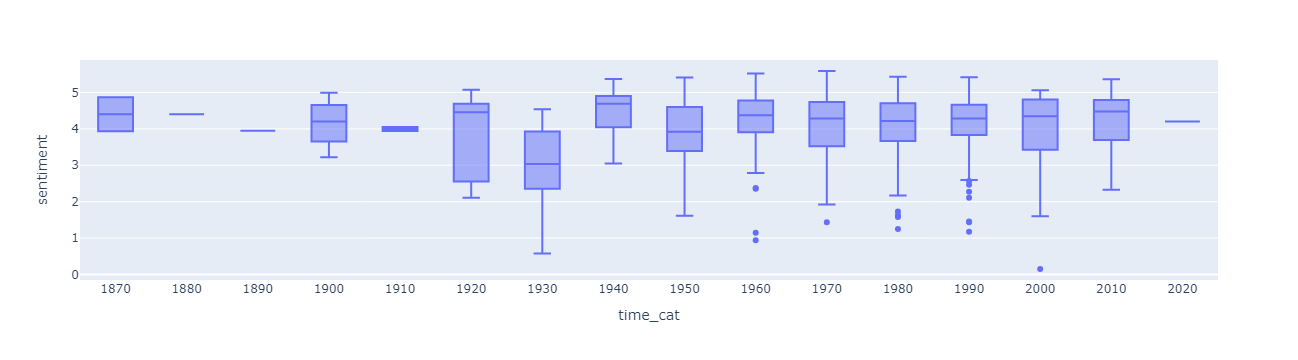

In [90]:
px.box(df, x='time_cat', y='sentiment')

In [113]:
df_country = pd.DataFrame().from_dict(country, orient='index').reset_index()
df_country.columns = ['genre', 'country']

df_coord = pd.DataFrame().from_dict(long_lat_dict, orient='index').reset_index()

In [116]:
df_coord.columns = ['genre', 'lat', 'long']

In [117]:
df = df.merge(df_country, on='genre')
df = df.merge(df_coord, on='genre')

In [102]:
country_sentiment = df.groupby('country').sentiment.mean().to_frame().reset_index()

In [103]:
country_sentiment

,country,sentiment
0,Australia,4.872331
1,Brasil,2.455633
2,Cameroun,4.027813
3,Cuba,3.718795
4,Danmark,4.049701
...,...,...
70,Србија,2.423138
71,پاکستان,3.899723
72,ประเทศไทย,4.261419
73,日本,3.559667


In [129]:
import pandas as pd
dataset_path = "cities15000.txt"
_df = pd.read_csv(dataset_path, sep='\t', header=None, names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date'])
    
def get_country_code_from_dataset(lat, lon):
    # Load GeoNames dataset into a DataFrame
    
    # Find the closest city based on latitude and longitude
    closest_city = _df.loc[((_df['latitude'] - lat)**2 + (_df['longitude'] - lon)**2).idxmin()]

    # Get the country code of the closest city
    country_code = closest_city['country code']

    return country_code

# Example usage:
latitude = 37.7749
longitude = -122.4194
  # Replace with the actual path to your GeoNames dataset

country_code = get_country_code_from_dataset(latitude, longitude)
print(country_code)

US


In [130]:
df['countrycode'] = df.apply(lambda row: get_country_code_from_dataset(row['lat'], row['long']), axis=1)

In [135]:
import pycountry

def alpha2_to_alpha3(alpha2_code):
    try:
        country = pycountry.countries.get(alpha_2=alpha2_code)
        if country:
            return country.alpha_3
        else:
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None


In [137]:
df['countrycode'] = df.countrycode.apply(alpha2_to_alpha3)

In [146]:
fig = px.choropleth(df, locations="countrycode",
                    color="sentiment", # lifeExp is a column of gapminder
                    hover_name="country_x", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma, 
             width=1080,
             height=720,
             title='Mean country sentiment in music genres'
             )


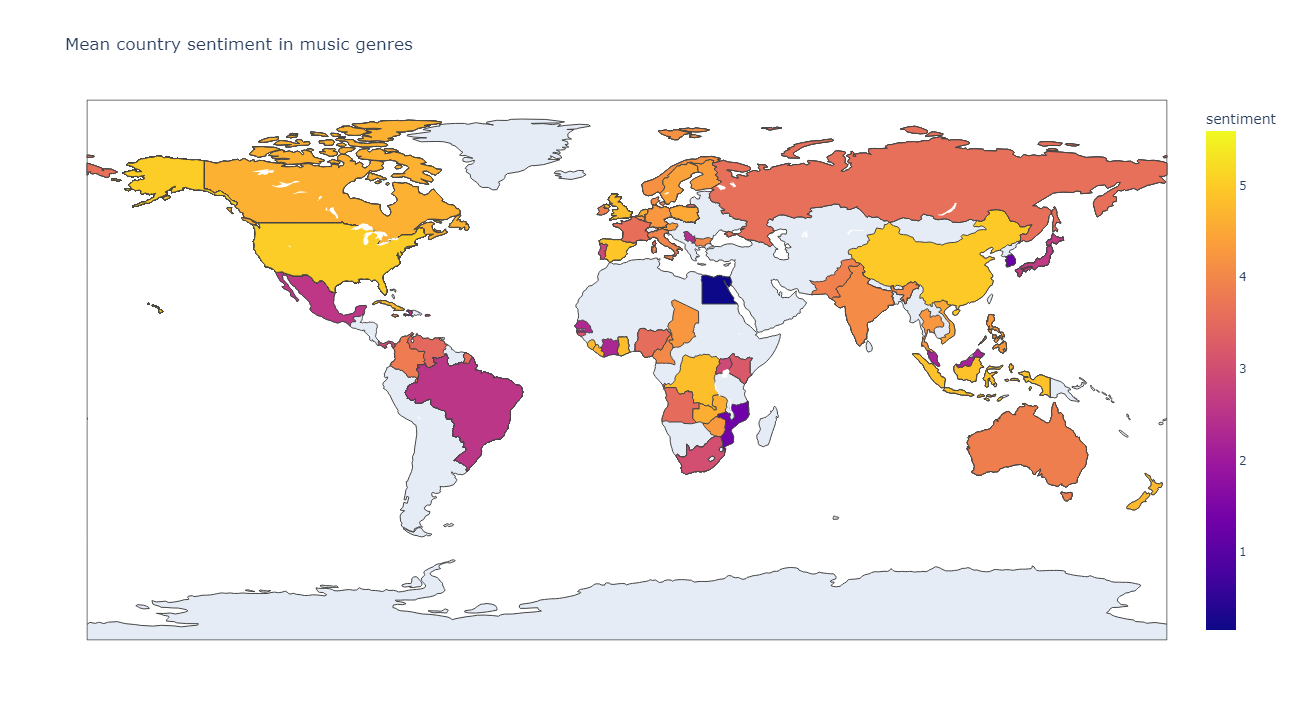

In [151]:
fig